#📌 Extracción

In [2]:
import pandas as pd
import requests
import json
# Importamos los datos, creamos el data frame y lo normalizamos
data_tele = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
data_json = json.loads(data_tele.text)
df_tele = pd.json_normalize(data_json)
df_tele.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [3]:
import numpy as np
df_tele.info()
# Hacemos strip para quitar espacios y eliminamos nulos o duplicados
df_tele['account.Charges.Total'] = df_tele['account.Charges.Total'].apply(lambda x: str(x).strip())
df_tele['account.Charges.Total'] = pd.to_numeric(df_tele['account.Charges.Total'], errors='coerce')
print(df_tele[df_tele['account.Charges.Total'].isna()])
df_tele['account.Charges.Total'] = df_tele['account.Charges.Total'].fillna(0)
print(df_tele[df_tele['account.Charges.Total'].isna()])
print(df_tele.isnull().sum())
print("Duplicados:", df_tele.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
# Traducimos las columnas
# Creamos la columna de cuentas diarias
df_tele['Cuentas_Diarias'] = df_tele['account.Charges.Monthly'] / 30
df_tele.columns = [
    'ClienteID', 'Churn', 'Genero', 'AdultoMayor', 'Pareja', 'Dependientes',
    'Meses_Contrato', 'Telefono', 'MultiplesLineas',
    'ServicioInternet', 'OnlineSecurity', 'OnlineBackup',
    'ProteccionDispositivo', 'Soporte', 'StreamingTV',
    'StreamingPeliculas', 'Contrato', 'PaperlessBilling',
    'MetodoPago', 'Cargos_Mensuales', 'Cargos_Total', 'Cuentas_Diarias'
]
# Traducción
df_tele['Genero'] = df_tele['Genero'].apply(lambda x: x.replace('Female', 'Femenino').replace('Male', 'Masculino'))
# Convertimos las palabras de yes or no a 1 y 0 para hacer analisis más fácil
for columnas in df_tele.columns:
    df_tele[columnas] = df_tele[columnas].replace({'Yes': 1, 'No': 0})
df_tele.info()
df_tele.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClienteID              7267 non-null   object 
 1   Churn                  7267 non-null   object 
 2   Genero                 7267 non-null   object 
 3   AdultoMayor            7267 non-null   int64  
 4   Pareja                 7267 non-null   int64  
 5   Dependientes           7267 non-null   int64  
 6   Meses_Contrato         7267 non-null   int64  
 7   Telefono               7267 non-null   int64  
 8   MultiplesLineas        7267 non-null   object 
 9   ServicioInternet       7267 non-null   object 
 10  OnlineSecurity         7267 non-null   object 
 11  OnlineBackup           7267 non-null   object 
 12  ProteccionDispositivo  7267 non-null   object 
 13  Soporte                7267 non-null   object 
 14  StreamingTV            7267 non-null   object 
 15  Stre

/tmp/ipython-input-1253532904.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tele[columnas] = df_tele[columnas].replace({'Yes': 1, 'No': 0})


,ClienteID,Churn,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,Telefono,MultiplesLineas,ServicioInternet,...,ProteccionDispositivo,Soporte,StreamingTV,StreamingPeliculas,Contrato,PaperlessBilling,MetodoPago,Cargos_Mensuales,Cargos_Total,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [5]:
# De estas columnas tenemos valores que no se convirtieron bien por tener valores nulos o diferentes de si / no
col = [1, 8, 10, 11, 12, 13, 14, 15]
for i in col:
    nombre = df_tele.columns[i]
    print(df_tele[nombre].unique())
for i in col:
    nombre = df_tele.columns[i]
    df_tele[nombre] = df_tele[nombre].fillna('0')
    df_tele[nombre] = df_tele[nombre].replace('', '0')
    df_tele[nombre] = df_tele[nombre].replace('No internet service', '0')
    df_tele[nombre] = df_tele[nombre].replace('No phone service', '0')
for i in col:
    nombre = df_tele.columns[i]
    print(df_tele[nombre].unique())
for i in col:
    nombre = df_tele.columns[i]
    df_tele[nombre] = df_tele[nombre].astype(np.int64)
df_tele.info()
df_tele.describe()

[0 1 '']
[0 1 'No phone service']
[0 1 'No internet service']
[1 0 'No internet service']
[0 1 'No internet service']
[1 0 'No internet service']
[1 0 'No internet service']
[0 1 'No internet service']
[0 1 '0']
[0 1 '0']
[0 1 '0']
[1 0 '0']
[0 1 '0']
[1 0 '0']
[1 0 '0']
[0 1 '0']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClienteID              7267 non-null   object 
 1   Churn                  7267 non-null   int64  
 2   Genero                 7267 non-null   object 
 3   AdultoMayor            7267 non-null   int64  
 4   Pareja                 7267 non-null   int64  
 5   Dependientes           7267 non-null   int64  
 6   Meses_Contrato         7267 non-null   int64  
 7   Telefono               7267 non-null   int64  
 8   MultiplesLineas        7267 non-null   int64  
 9   ServicioInternet       7267 non-nu

,Churn,AdultoMayor,Pareja,Dependientes,Meses_Contrato,Telefono,MultiplesLineas,OnlineSecurity,OnlineBackup,ProteccionDispositivo,Soporte,StreamingTV,StreamingPeliculas,PaperlessBilling,Cargos_Mensuales,Cargos_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#📊 Carga y análisis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ClienteID              7267 non-null   object 
 1   Churn                  7267 non-null   int64  
 2   Genero                 7267 non-null   object 
 3   AdultoMayor            7267 non-null   int64  
 4   Pareja                 7267 non-null   int64  
 5   Dependientes           7267 non-null   int64  
 6   Meses_Contrato         7267 non-null   int64  
 7   Telefono               7267 non-null   int64  
 8   MultiplesLineas        7267 non-null   int64  
 9   ServicioInternet       7267 non-null   object 
 10  OnlineSecurity         7267 non-null   int64  
 11  OnlineBackup           7267 non-null   int64  
 12  ProteccionDispositivo  7267 non-null   int64  
 13  Soporte                7267 non-null   int64  
 14  StreamingTV            7267 non-null   int64  
 15  Stre

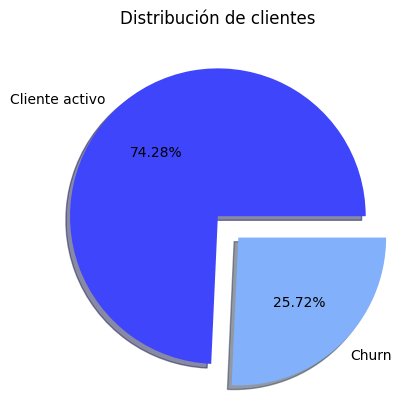

Promedio de cargos mensuales:  64.72009770194028
Desviación estándar de cargos mensuales:  30.12957188566699
Mediana de cargos mensuales:  70.3
Promedio de cargos totales:  2277.182035227742
Desviación estándar de cargos totales:  2268.648586624864
Mediana de cargos totales:  1389.2
Promedio de cuentas diarias:  2.1573365900646757
Desviación estándar de cuentas diarias:  2.3433333333333333
Mediana de cuentas diarias:  1.0043190628555607


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
clientes = 7267
df_tele.describe()
df_tele.info()
inactivos = df_tele['Churn'].sum()
clientes = 7267 - inactivos
y = np.array([clientes, inactivos])
# Creamos un pie chart para ver que porcentaje de clientes se quedaron
mylabels = ["Cliente activo", "Churn"]
myexplode = [0, 0.2]
mycolors = ["#3e45fa", "#82b0fa"]
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, colors = mycolors, autopct = "%1.2f%%")
plt.title("Distribución de clientes")
plt.show()
# Obtenemos datos de promedio, desviación y mediana para analizar de los clientes totales, evasivos y activos
cmpr = df_tele['Cargos_Mensuales'].mean()
cmstd = df_tele['Cargos_Mensuales'].std()
cmm = df_tele['Cargos_Mensuales'].median()
print('Promedio de cargos mensuales: ', cmpr)
print('Desviación estándar de cargos mensuales: ', cmstd)
print('Mediana de cargos mensuales: ', cmm)
ctpr = df_tele['Cargos_Total'].mean()
ctstd = df_tele['Cargos_Total'].std()
ctm = df_tele['Cargos_Total'].median()
print('Promedio de cargos totales: ', ctpr)
print('Desviación estándar de cargos totales: ', ctstd)
print('Mediana de cargos totales: ', ctm)
cdpr = df_tele['Cuentas_Diarias'].mean()
cdstd = df_tele['Cuentas_Diarias'].median()
cdm = df_tele['Cuentas_Diarias'].std()
print('Promedio de cuentas diarias: ', cdpr)
print('Desviación estándar de cuentas diarias: ', cdstd)
print('Mediana de cuentas diarias: ', cdm)

In [7]:
import plotly.graph_objects as go
import plotly.express as px
df_churn = df_tele[df_tele['Churn'] == 1]
df_active = df_tele[df_tele['Churn'] == 0]
df_churn = df_churn.reset_index(drop=True)
df_active = df_active.reset_index(drop=True)
cmprc = df_churn['Cargos_Mensuales'].mean()
cmstdc = df_churn['Cargos_Mensuales'].std()
cmmc = df_churn['Cargos_Mensuales'].median()
cmpra = df_active['Cargos_Mensuales'].mean()
cmstda = df_active['Cargos_Mensuales'].std()
cmmra = df_active['Cargos_Mensuales'].median()
ctprc = df_churn['Cargos_Total'].mean()
ctstdc = df_churn['Cargos_Total'].std()
ctmc = df_churn['Cargos_Total'].median()
ctpra = df_active['Cargos_Total'].mean()
ctstda = df_active['Cargos_Total'].std()
ctma = df_active['Cargos_Total'].median()
cdprc = df_churn['Cuentas_Diarias'].mean()
cdstdc = df_churn['Cuentas_Diarias'].median()
cdmc = df_churn['Cuentas_Diarias'].std()
cdpra = df_active['Cuentas_Diarias'].mean()
cdstda = df_active['Cuentas_Diarias'].std()
cdma = df_active['Cuentas_Diarias'].median()
Cdiaria = ['Promedio', 'Mediana', 'Desviación Est.']
# Creamos los gráficos
fig = go.Figure(data=[
    go.Bar(name='Clientes', x=Cdiaria, y=[cmpr, cmstd, cmm],  marker_color = '#fac761'),
    go.Bar(name='Activos', x=Cdiaria, y=[cmpra, cmstda, cmmra],  marker_color = '#fab62d'),
    go.Bar(name='Churn', x=Cdiaria, y=[cmprc, cmstdc, cmmc], marker_color = '#de9400')
])
fig.update_layout(barmode='group', title = 'Cargos mensuales')
fig.show()
fig = go.Figure(data=[
    go.Bar(name='Clientes', x=Cdiaria, y=[ctpr, ctstd, ctm],  marker_color = '#42d7f5'),
    go.Bar(name='Activos', x=Cdiaria, y=[ctpra, ctstda, ctma],  marker_color = '#42b6f5'),
    go.Bar(name='Churn', x=Cdiaria, y=[ctprc, ctstdc, ctmc], marker_color = '#426ff5')
])
fig.update_layout(barmode='group', title = 'Cargos totales')
fig.show()
fig = go.Figure(data=[
    go.Bar(name='Clientes', x=Cdiaria, y=[cdpr, cdstd, cdm],  marker_color = '#f54275'),
    go.Bar(name='Activos', x=Cdiaria, y=[cdpra, cdstda, cdma],  marker_color = '#f54254'),
    go.Bar(name='Churn', x=Cdiaria, y=[cdprc, cdstdc, cdmc], marker_color = '#f54b42')
])
fig.update_layout(barmode='group', title = 'Cuentas diarias')
fig.show()
m = 0
f = 0
mc = 0
fc = 0
for i in range(7267):
    if df_tele['Genero'][i] == 'Masculino':
        m += 1
    else:
        f += 1
for i in range(1868):
      if df_churn['Genero'][i] == 'Masculino':
        mc += 1
      else:
        fc += 1
print(mc)

929


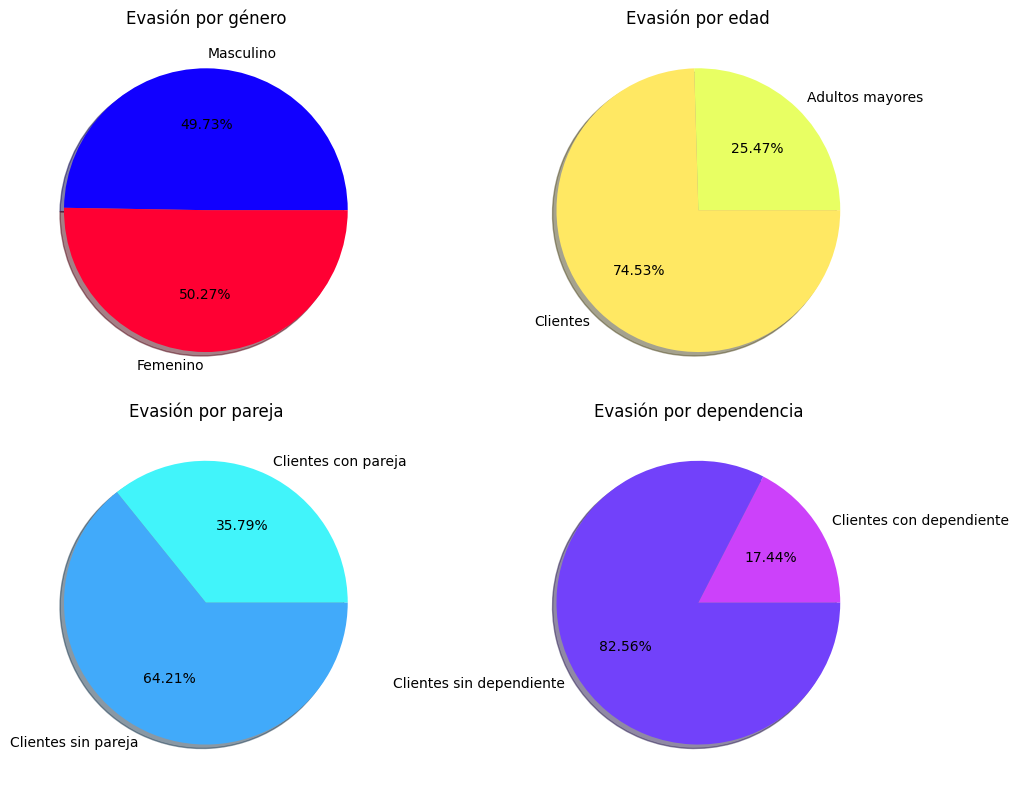

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
y = np.array([mc, fc])
# Graficos para ver la distribución según diferentes parametros
mylabels = ["Masculino", "Femenino"]
mycolors = ["#1100ff", "#ff0033"]
axs[0, 0].pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct="%1.2f%%")
axs[0, 0].set_title("Evasión por género")
adc = df_churn['AdultoMayor'].sum()
y = np.array([adc, 1869 - adc])
mylabels = ["Adultos mayores", "Clientes"]
mycolors = ["#e8ff63", "#ffe863"]
axs[0, 1].pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct="%1.2f%%")
axs[0, 1].set_title("Evasión por edad")
pc = df_churn['Pareja'].sum()
y = np.array([pc, 1869 - pc])
mylabels = ["Clientes con pareja", "Clientes sin pareja"]
mycolors = ["#41f4fa", "#41aafa"]
axs[1, 0].pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct="%1.2f%%")
axs[1, 0].set_title("Evasión por pareja")
dc = df_churn['Dependientes'].sum()
y = np.array([dc, 1869 - dc])
mylabels = ["Clientes con dependiente", "Clientes sin dependiente"]
mycolors = ["#cc41fa", "#7241fa"]
axs[1, 1].pie(y, labels=mylabels, shadow=True, colors=mycolors, autopct="%1.2f%%")
axs[1, 1].set_title("Evasión por dependencia")

plt.tight_layout()
plt.show()

In [15]:
df_churn['Contrato'].unique()
df_churn['MetodoPago'].unique()
# Histograma para ver la distribución de otros parametros.
fig = px.histogram(df_churn, x="MetodoPago", color="MetodoPago",
                   category_orders={"MetodoPago": [
                       "Electronic check",
                       "Mailed check",
                       "Credit card (automatic)",
                       "Bank transfer (automatic)"
                   ]},
                   title="Distribución de tipos de pago",
                   text_auto=True)  # Muestra el número encima de cada barra

fig.update_layout(xaxis_title="Metodo de pago", yaxis_title="Número de clientes")
fig.show()
fig = px.histogram(df_churn, x="Contrato", color="Contrato",
                   category_orders={"Contrato": [
                       "Month-to-month",
                       "One year",
                       "Two year"
                   ]},
                   title="Distribución de tipos de contrato",
                   text_auto=True)

fig.update_layout(xaxis_title="Tipo de contrato", yaxis_title="Número de clientes")
fig.show()

In [16]:
# Comparando los meses de contrato de los que se quedaron y los que se fueron
categorias = ["Evasión", "Activos"]
valores = [df_churn['Meses_Contrato'].mean(), df_active['Meses_Contrato'].mean()]
fig = px.bar(x=categorias, y=valores, text=valores, color=categorias,
             title="Promedio de meses por contrato")

fig.update_layout(xaxis_title="Clientes", yaxis_title="Meses")
fig.show()

In [18]:
# Viendo la distribución del tipo de servicio de internet
df_churn['ServicioInternet'].unique()
fig = px.histogram(df_churn, x="ServicioInternet", color="ServicioInternet",
                   category_orders={"ServicioInternet": [
                       "Month-to-month",
                       "One year",
                       "No tiene"
                   ]},
                   title="Distribución de servicio internet",
                   text_auto=True)

fig.update_layout(xaxis_title="Servicio de internet", yaxis_title="Número de clientes")
fig.show()

#📄Informe final

# **Introducción**
La empresa Telecom X nos pidió ayuda ya que presentan una alta tasa de cancelación en sus servicios y quieren comprender por que sucede esto, nosotros con este Challenge ayudamos a la empresa a darle información sobre los clientes que se han ido.
# Limpieza y tratamiento de datos
Lo primero que se hizo fue obtener de github el archivo .json que contenía la información de los clientes, después de obtenerlo se normalizo el archivo y se un dataframe para ordenar la información y poder hacer la parte de ETL. Se procedió a revisar las categorías, sus tipos de datos y también si existían valores nulos o duplicados. Esto se hizo con ayuda de funciones como isna(), unique(), info() , etc.
Después de hacer esto se convirtieron las palabras Yes/No a 1 y 0 para facilitar la parte del analisis y poder obtener parametros como el promedio, mediana y desviación estandar de ciertas columnas más facilmente. Aunque habia ocasiones en las que había más opciones que Yes/No por lo que se trataron también para limpiar por completo los datos.

Se hizo una traducción de las columndas del dataframe para presentarselo de una mejor manera a los de telecom X.

# Análisis exploratorio de datos
Después de limpiar los datos se hicieron los analisis, el primero fue observar que un 25% de clientes han cancelado los servicios, después de esto, con un barplot se hizo un gráfico en el que se visualiza el promedio, las desviación estándar y la mediana de los cargos totales, mensuales y cuentas diarias; de ese gráfico podemos ver que en promedio los clientes que cancelaron tienen cargos mayores por mes y por día en comparación de los clientes que se quedaron, los cargos totales son menores en promedio pero esto se debe a que no se quedaron por mucho tiempo por lo que sus meses totales de contrato son menores.

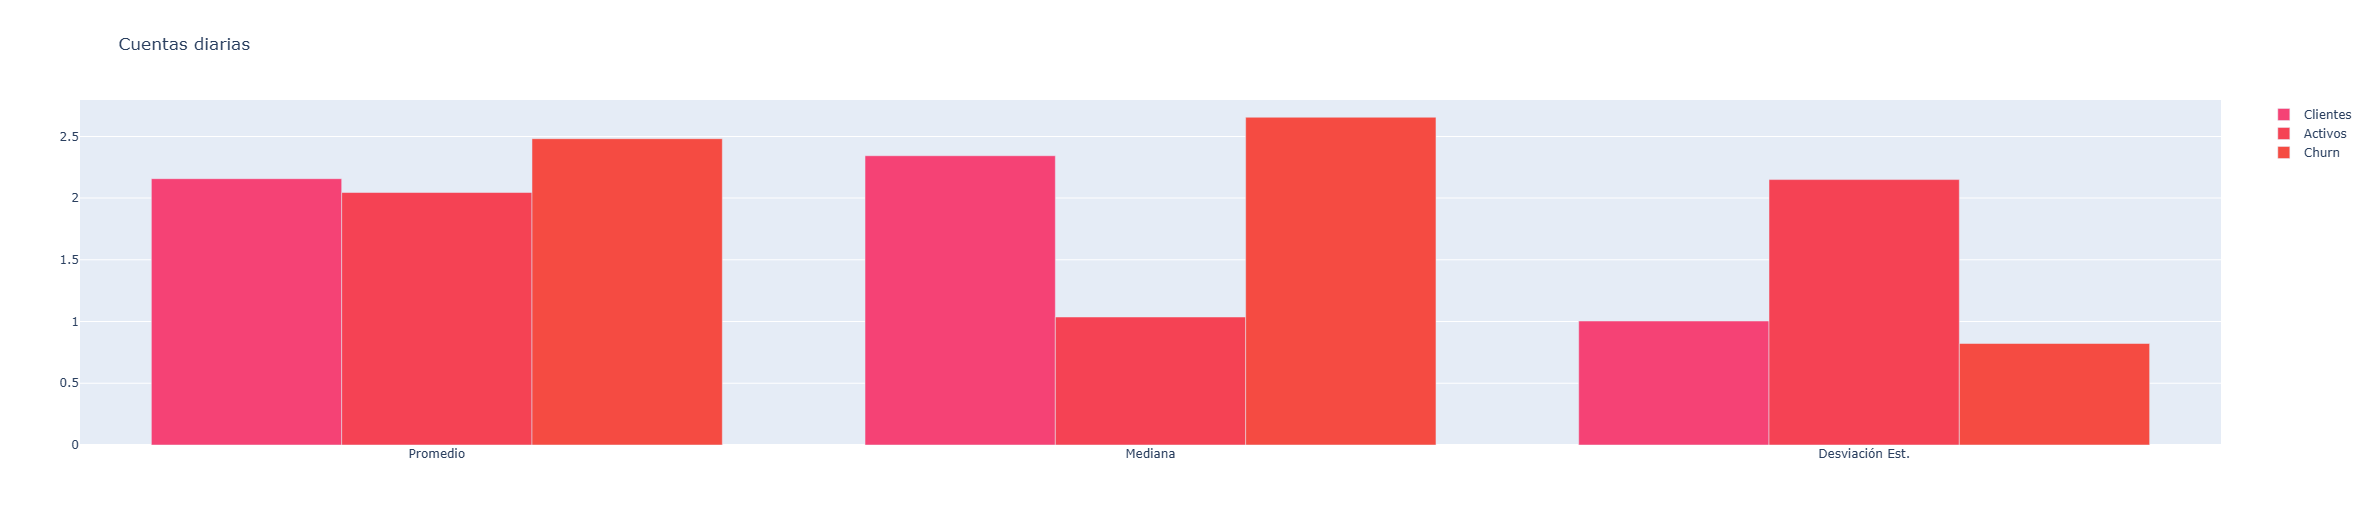
A continuación con gráficas de pastel se hizo un analisis de los clientes que cancelaron por variables como la edad, si tienen pareja, dependientes o por su género, pero no se encontró un patrón muy repetido que nos pudiera dar mucha información en concreto, solo que la mayoría de clientes que abandonaron no tienen dependientes y no son adultos mayores.

Los analisis que se hicieron después tienen que ver con el tipo de pago que usan y tipo de contrato; en estos si se pudo ver una tendencia muy marcada de que los clientes que más abandonaron usan pago electronico y que su contrato era mes a mes, en el caso del servicio a internet se tiene que los que tuvieron fibra optica presentaron una mayor deserción en comparación a DSL o los que o tenían internet.
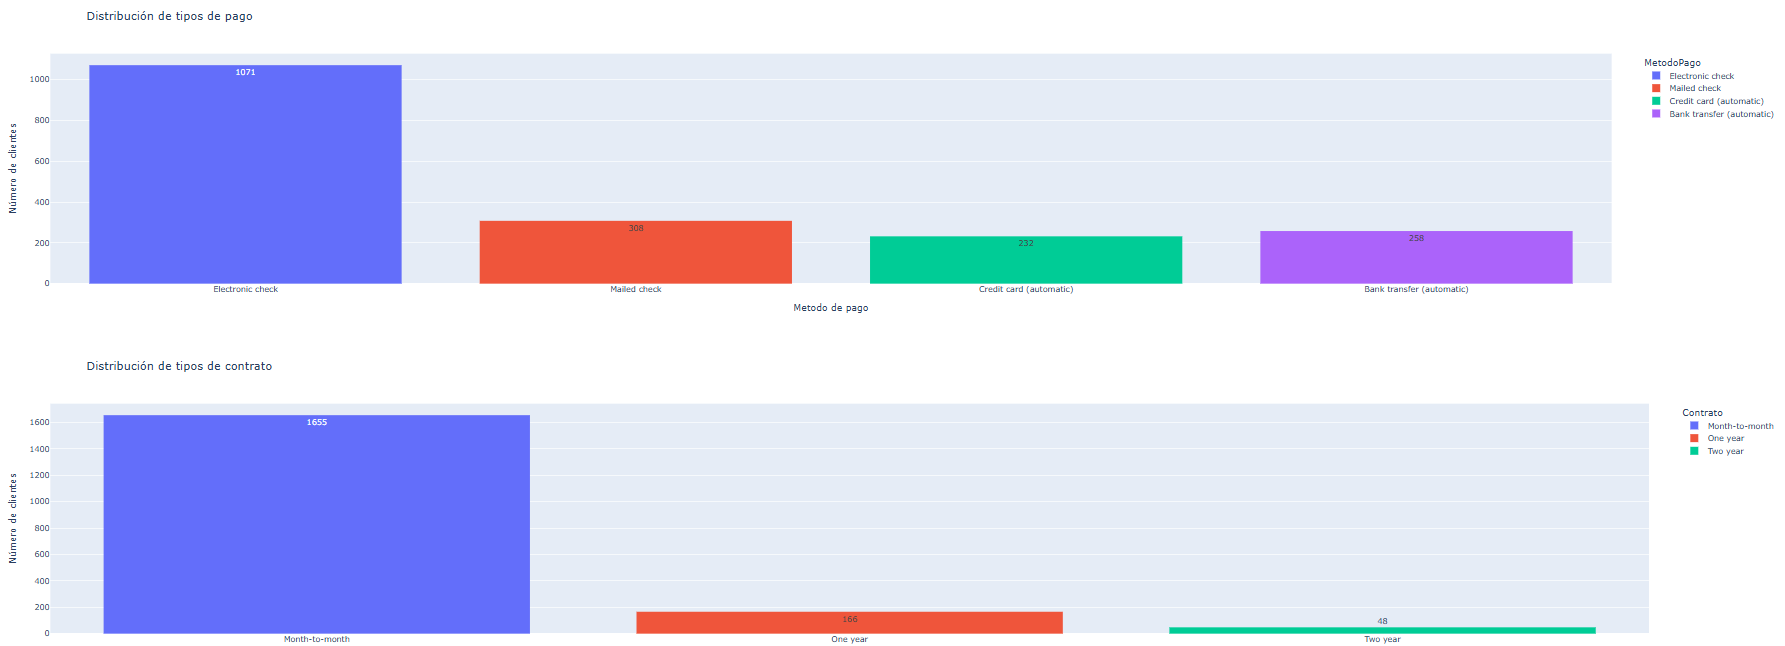

# Conclusiones e insights


*   Un 25% de los clientes abandonó la empresa
*   Las cuentas mensuales son mayores en promedio de los clientes que dejaron la empresa, esto podría tener relación a su vez con el tipo de contrato de la mayoría de ellos que era pago mes a mes
*   En comparación con los clientes activos que estuvieron 34 meses en promedio los que abandonaron estuvieron 17 meses en promedio
*   El servicio de internet de fibra óptica puede ser que presente mayores problemas pues la mayoría de los clientes que abandonaron contaban con este servicio.
*   Los clientes churn en su mayoría usaban el Método de pago Electronic Check, puede que este Metodo no sea fácil de usar.

# Recomendaciones

*   Revisar y asesorar a los clientes sobre los dierentes métodos de pago, ayudarlos a que elijan el que mejor se adecue a ellos y que todos sean fáciles de usar
*   Mejorar el servicio de internet de fibra óptica ya que puede que presente problemas según los análisis
*   Promociones para los clientes que se queden más tiempo, esto para hacer que mantengan sus contratos
*   Reducir los precios de los contratos mes a mes para que los clientes no tengan que pagar tanto y que se mantengan con la empresa
*   Dar pruebas gratis a los usuarios para que se familiaricen con los s4ervicios de la empresa y atraer nuevos clientes




